# Prediction Model For Car Price

### Import Python Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [65]:
car=pd.read_csv('quikr_car_updated.csv',encoding='ANSI')

In [66]:
car.head()

,name,company,year,Price,kms_driven,fuel_type,transmission
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"5,25,000",40 kms,Diesel,Automatic
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"4,25,000","28,000 kms",Petrol,Automatic
2,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel,Automatic
3,Hyundai Eon,Hyundai,2013,"2,90,000","25,000 kms",Petrol,Automatic
4,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"3,50,000","60,000 kms",Petrol,Automatic


In [67]:
car.shape

(992, 7)

In [68]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          992 non-null    object
 1   company       992 non-null    object
 2   year          992 non-null    object
 3   Price         992 non-null    object
 4   kms_driven    940 non-null    object
 5   fuel_type     937 non-null    object
 6   transmission  992 non-null    object
dtypes: object(7)
memory usage: 54.4+ KB


### Creating Backup Copy 

In [69]:
backup=car.copy()

## Cleaning Data 

### Changes
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URGENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

#### year has many non-year values 

In [70]:
car=car[car['year'].str.isnumeric()]

#### year is in object change to integer 

In [71]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price 

In [72]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object 

In [73]:
car['Price']=car['Price'].str.replace(',','').astype(int)

#### kms_driven has object values with kms at last 

In [74]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and 2 columns has "Petrol" as input  

In [75]:
car=car[car['kms_driven'].str.isnumeric()]

In [76]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values 

In [77]:
car=car[~car['fuel_type'].isna()]

In [78]:
car.shape

(916, 7)

### name and company had spammed data
- But with the previous cleaning, those rows got removed
- Company does not need any cleaning now and changing car names and keeping only the first three words

In [79]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data 

In [80]:
car=car.reset_index(drop=True)

## Cleaned Data 

In [81]:
car

,name,company,year,Price,kms_driven,fuel_type,transmission
0,Mahindra Jeep CL550,Mahindra,2006,525000,40,Diesel,Automatic
1,Hyundai Grand i10,Hyundai,2014,425000,28000,Petrol,Automatic
2,Hyundai Eon,Hyundai,2013,290000,25000,Petrol,Automatic
3,Maruti Suzuki Alto,Maruti,2015,350000,60000,Petrol,Automatic
4,Maruti Suzuki Stingray,Maruti,2015,415000,30000,Petrol,Automatic
...,...,...,...,...,...,...,...
911,Kia Sonet,Kia,2021,1198000,14469,Diesel,Manual
912,Maruti Celerio,Maruti,2022,719000,6872,CNG,Manual
913,Hyundai Xcent,Hyundai,2022,700000,50000,CNG,Manual
914,Maruti Alto 800,Maruti,2021,480000,21556,CNG,Manual


### Dataset was of 992 rows has been cleaned and removed all unnecessary input and it is reduced to 916 rows(datas)

#### Making dataset of car into CSV files 

In [82]:
car.to_csv('Cleaned_Car_data.csv')

In [83]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          916 non-null    object
 1   company       916 non-null    object
 2   year          916 non-null    int32 
 3   Price         916 non-null    int32 
 4   kms_driven    916 non-null    int32 
 5   fuel_type     916 non-null    object
 6   transmission  916 non-null    object
dtypes: int32(3), object(4)
memory usage: 39.5+ KB


In [84]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type,transmission
count,916,916,916.000000,9.160000e+02,916.000000,916,916
unique,334,29,NaN,NaN,NaN,5,2
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol,Automatic
freq,51,236,NaN,NaN,NaN,491,459
mean,NaN,NaN,2013.295852,5.486076e+05,44112.096070,NaN,NaN
std,NaN,NaN,4.511409,6.171599e+05,35144.366076,NaN,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN
25%,NaN,NaN,2011.000000,2.300000e+05,22000.000000,NaN,NaN
50%,NaN,NaN,2014.000000,3.800000e+05,39000.000000,NaN,NaN
75%,NaN,NaN,2016.000000,6.112500e+05,55000.000000,NaN,NaN


In [85]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price 

In [86]:
car['company'].unique()

array(['Mahindra', 'Hyundai', 'Maruti', 'Audi', 'Toyota', 'Skoda',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Ford', 'Mini',
       'Chevrolet', 'Tata', 'Hindustan', 'Volkswagen', 'Nissan', 'Fiat',
       'Mercedes', 'BMW', 'Jaguar', 'Jeep', 'Hyundai ', 'MG',
       'Land Rover', 'Volvo', 'Kia', 'Force', 'Land'], dtype=object)

In [87]:
import seaborn as sns

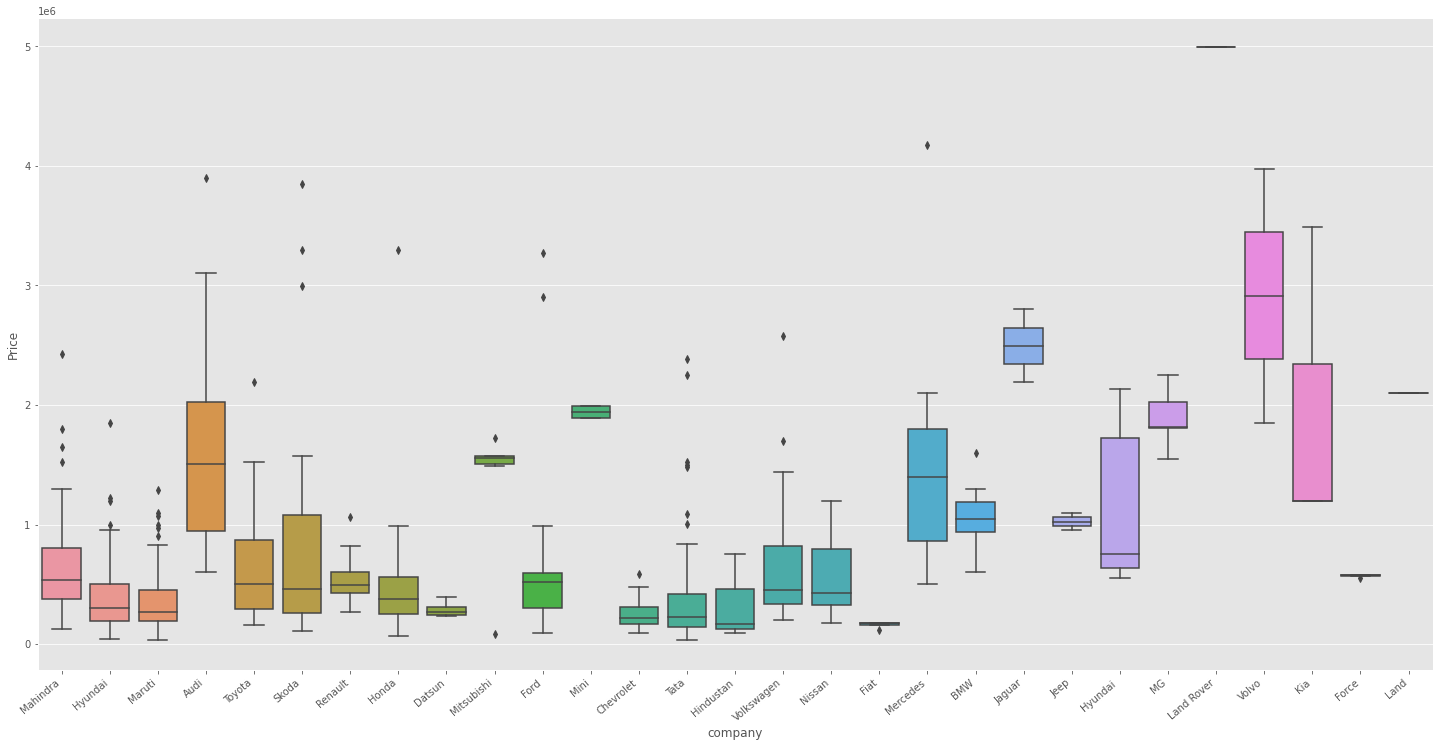

In [88]:
plt.subplots(figsize=(25,12))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price 

c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\omkar\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

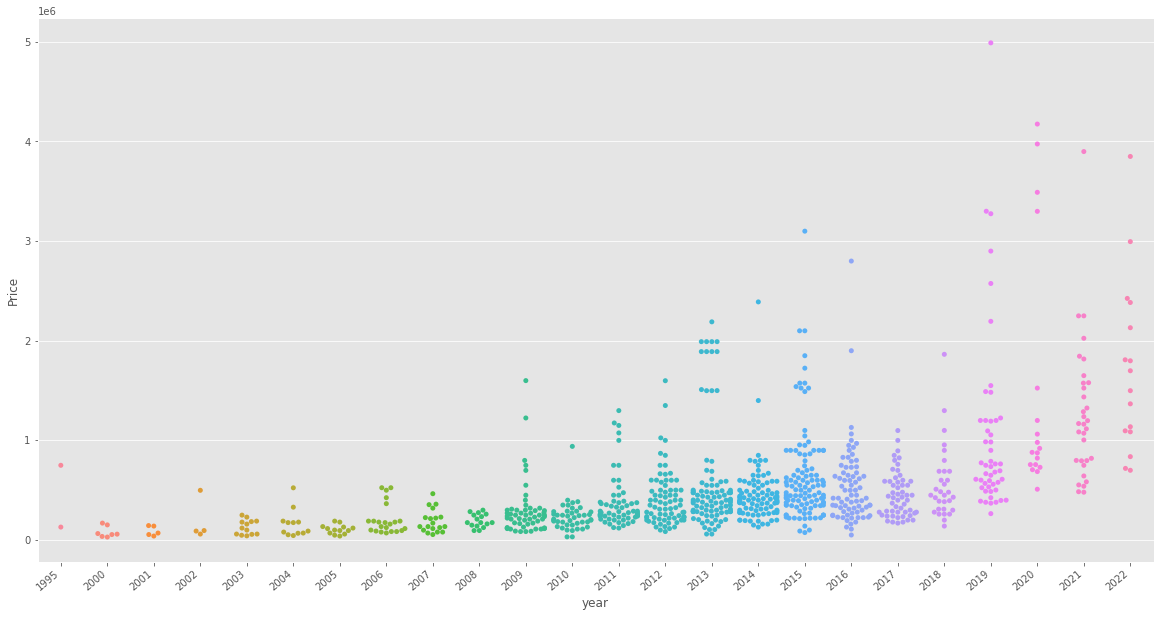

In [89]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price 

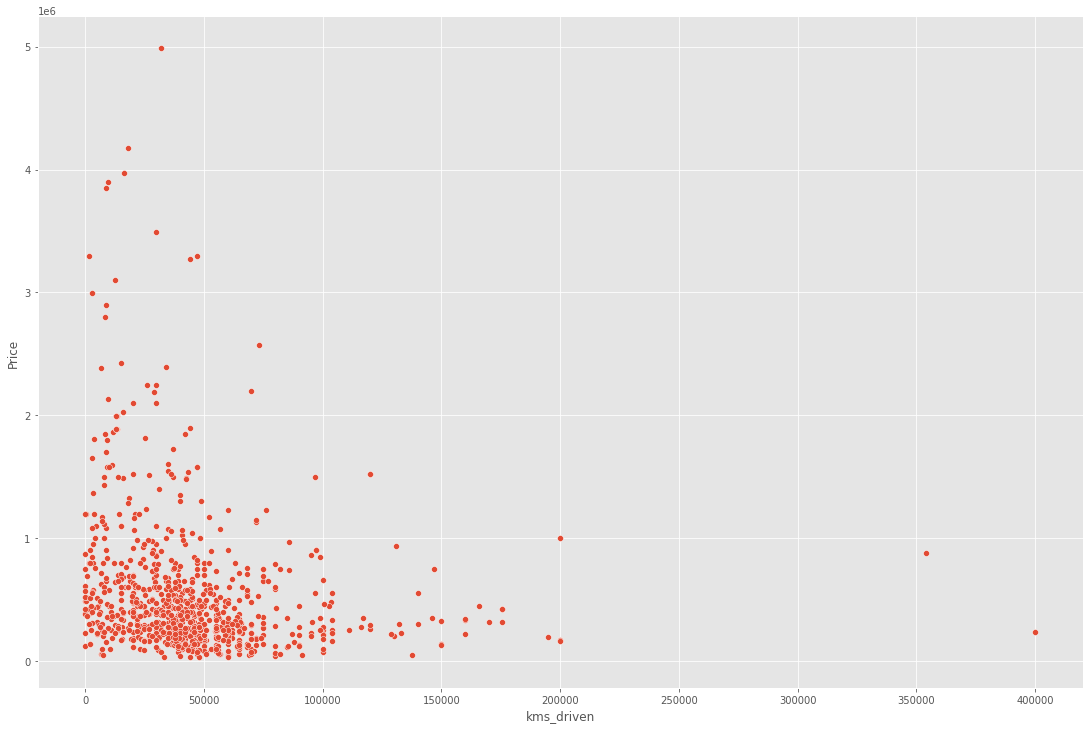

In [90]:
sns.relplot(x='kms_driven',y='Price',data=car,height=10,aspect=1.5)

### Checking relationship of Fuel Type with Price 

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

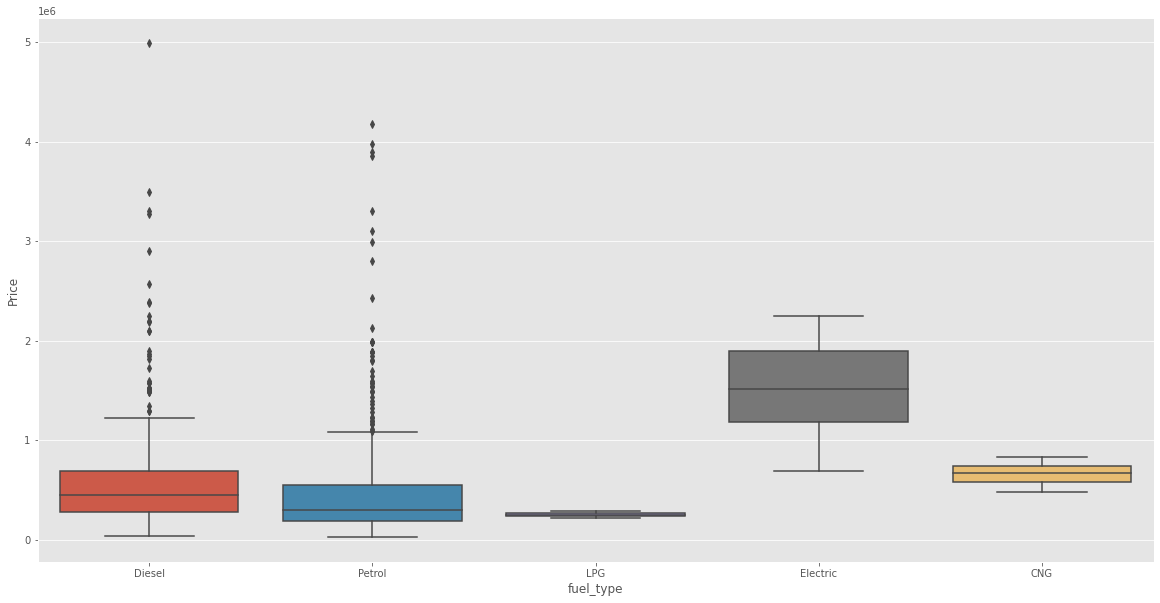

In [91]:
plt.subplots(figsize=(20,10))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed 

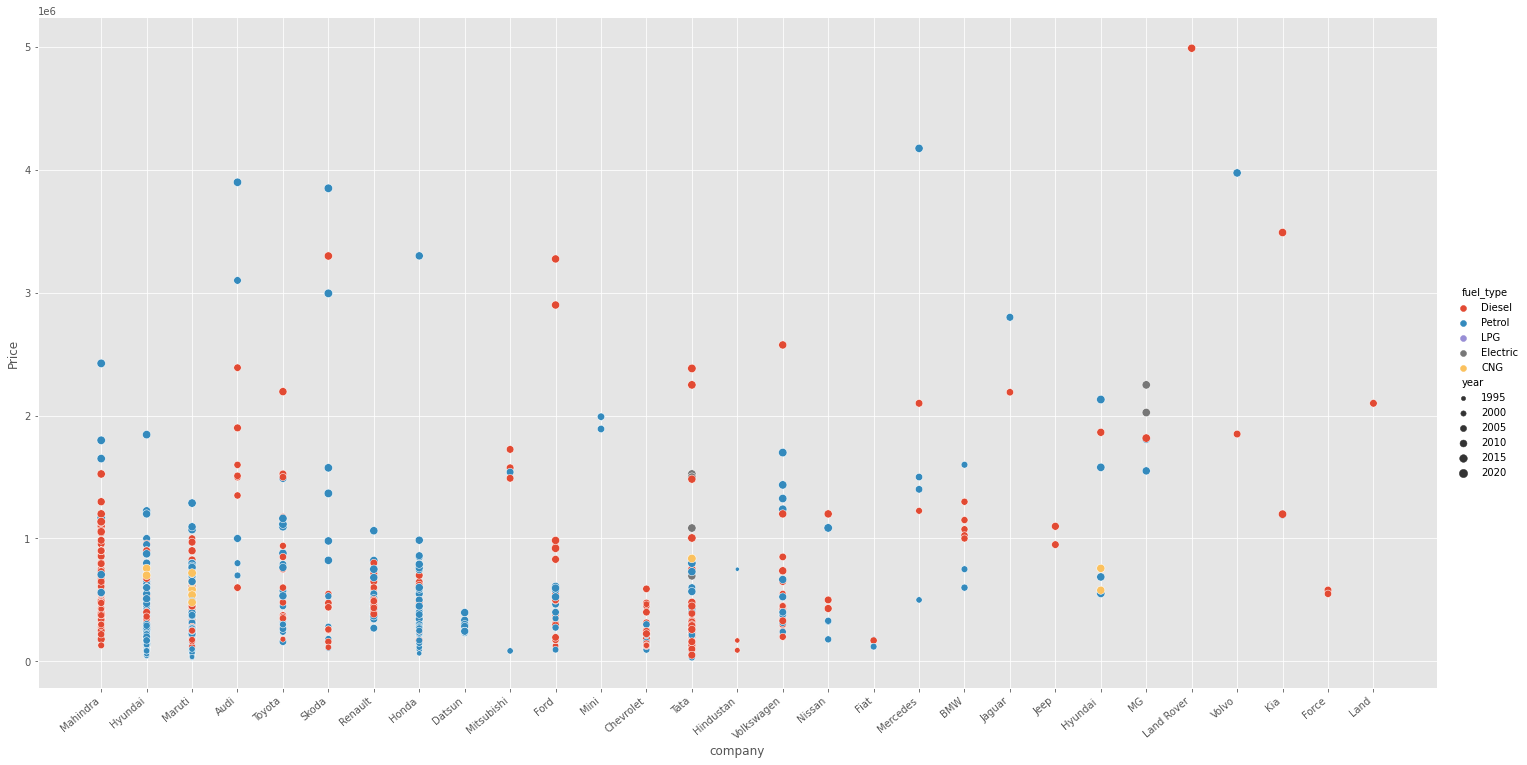

In [92]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=10,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data 
- Divide data into 2 parts
- X = name, company, year, kms_driven, fuel_type
- y = Price

In [93]:
X=car[['name','company','year','kms_driven','fuel_type','transmission']]
y=car['Price']

In [94]:
X

,name,company,year,kms_driven,fuel_type,transmission
0,Mahindra Jeep CL550,Mahindra,2006,40,Diesel,Automatic
1,Hyundai Grand i10,Hyundai,2014,28000,Petrol,Automatic
2,Hyundai Eon,Hyundai,2013,25000,Petrol,Automatic
3,Maruti Suzuki Alto,Maruti,2015,60000,Petrol,Automatic
4,Maruti Suzuki Stingray,Maruti,2015,30000,Petrol,Automatic
...,...,...,...,...,...,...
911,Kia Sonet,Kia,2021,14469,Diesel,Manual
912,Maruti Celerio,Maruti,2022,6872,CNG,Manual
913,Hyundai Xcent,Hyundai,2022,50000,CNG,Manual
914,Maruti Alto 800,Maruti,2021,21556,CNG,Manual


In [95]:
y

0       525000
1       425000
2       290000
3       350000
4       415000
        ...   
911    1198000
912     719000
913     700000
914     480000
915     837000
Name: Price, Length: 915, dtype: int32

### Applying Train Test Split 

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories 

In [99]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','transmission']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [100]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','transmission']),
                                    remainder='passthrough')

### Linear Regression Model 

In [101]:
lr=LinearRegression()

#### Making a Pipeline 

In [102]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the model 

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q2 Premium', 'Audi Q3 2.0', 'Audi Q5 2.0',
       'Audi Q7', 'BMW 3 Series', 'BMW 5 Series', 'BMW 7 Series',
       'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d', 'Chevrolet Beat...
       'Kia', 'Land', 'Land Rover', 'MG', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object)]),
         

In [104]:
y_pred=pipe.predict(X_test)

#### Checking R2 score (Accuracy) 

In [105]:
r2_score(y_test,y_pred)

0.5940823483792625

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.90 as R2 score 

In [106]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [107]:
np.argmax(scores)

411

In [108]:
scores[np.argmax(scores)]

0.8920824717503801

#### Predicting Price of Car  

In [109]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol','Manual']).reshape(1,6)))

array([452917.16659898])

### The best model is found at a certain random state

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8920824717503801

#### Accuracy of Prediction Analysis is 89.46 %

#### Predicting Car Price 

In [111]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type','transmission'],
                          data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol','Automatic']).reshape(1,6)))

array([508721.84315018])

### Converting into Pickle File 

In [112]:
import pickle

In [113]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

#### Car Name 

In [114]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q2 Premium', 'Audi Q3 2.0', 'Audi Q5 2.0',
       'Audi Q7', 'BMW 3 Series', 'BMW 5 Series', 'BMW 7 Series',
       'BMW X1', 'BMW X1 sDrive20d', 'BMW X1 xDrive20d', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS', 'Chevrolet Beat LT',
       'Chevrolet Beat PS', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2', 'Chevrolet Sail UVA',
       'Chevrolet Spark', 'Chevrolet Spark 1.0', 'Chevrolet Spark LS',
       'Chevrolet Spark LT', 'Chevrolet Tavera LS',
       'Chevrolet Tavera Neo', 'Datsun GO T', 'Datsun Go Plus',
       'Datsun Redi GO', 'Datsun Redi Go', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend', 'Ford Ecosport',
       'Ford Ecosports', 'Ford Endeav

#### Car Company 

In [115]:
pipe.steps[0][1].transformers[0][1].categories[1]

array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Hyundai ', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Land Rover', 'MG', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

__Fuel Types__

In [116]:
pipe.steps[0][1].transformers[0][1].categories[2]

array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)

In [117]:
pipe.steps[0][1].transformers[0][1].categories[3]

array(['Automatic', 'Manual'], dtype=object)